In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [2 8 4 5 8 5 9 4 2 2]


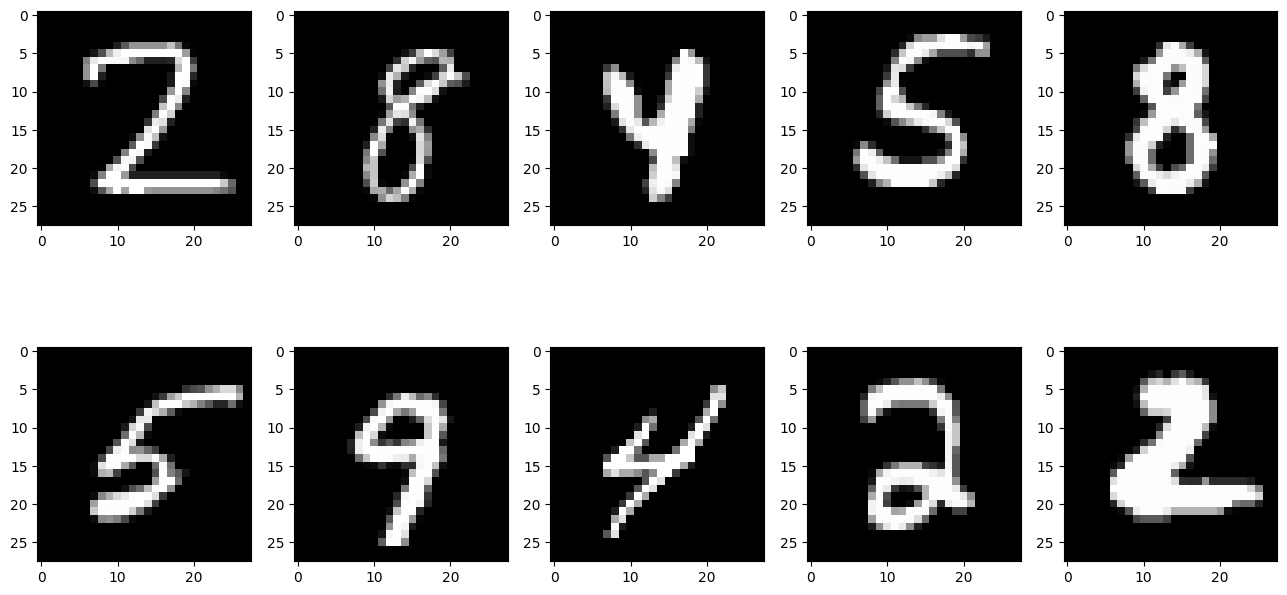

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [8]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [32]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Train the model

In [34]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4179 - accuracy: 0.7650
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4634 - accuracy: 0.8386
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4234 - accuracy: 0.8484
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4071 - accuracy: 0.8500
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4013 - accuracy: 0.8511
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3962 - accuracy: 0.8514
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3931 - accuracy: 0.8522
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3922 - accuracy: 0.8507
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3898 - accuracy: 0.8510
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.388

Plot the loss and accuracy graphs

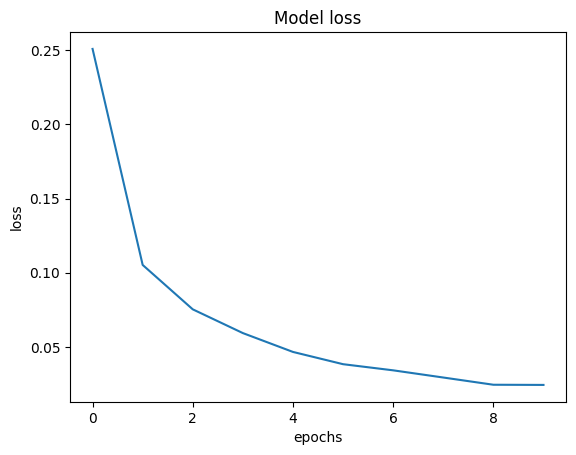

In [29]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

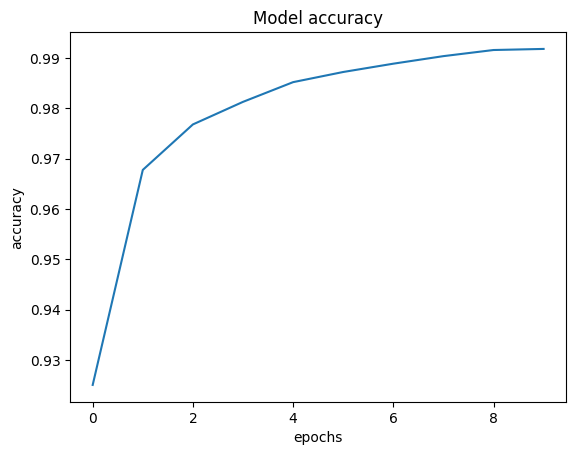

In [30]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [31]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9764
Loss of the Test dataset is: 0.10813723504543304
Accuracy of the test dataset is: 0.9764000177383423


Save the model weights

In [35]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

Get Predictions

In [36]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


Calculate Confusion Matrix

In [37]:
cm = confusion_matrix(test_target, predicted_classes)

Plot the Confusion Matrix

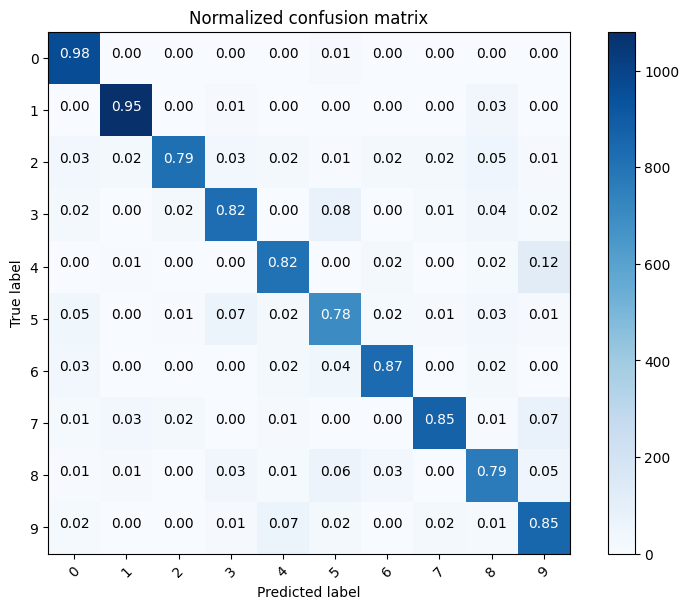

In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [str(i) for i in range(10)]  # Assuming 10 classes in MNIST
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()
